# Features Scores

In [1]:
# Library
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
stock_name = 'AMD'
start = '2018-01-01' 
end = '2018-09-14'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
1,2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2,2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
3,2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
4,2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.columns = ['Adj_Close' if x=='Adj Close' else x for x in df.columns]
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
1,2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2,2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
3,2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
4,2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


# Simple Single Linear Regression

In [6]:
# Use one feature
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


stock_model = ols("Adj_Close ~ Open", data=df).fit()

In [7]:
stock_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.616e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          4.22e-175
Time:                        21:20:26   Log-Likelihood:                -134.06
No. Observations:                 178   AIC:                             272.1
Df Residuals:                     176   BIC:                             278.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1905      0.124     -1.532      0.127      -0.436       0.055
Open           1.0168      0.008    127.129      0.000       1.001       1.033
==============================================================================
Omnibus:                       44.008   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.550
Skew:                          -0.361   Prob(JB):                    1.15e-122
Kurtosis:                      11.671   Cond. No.                         50.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

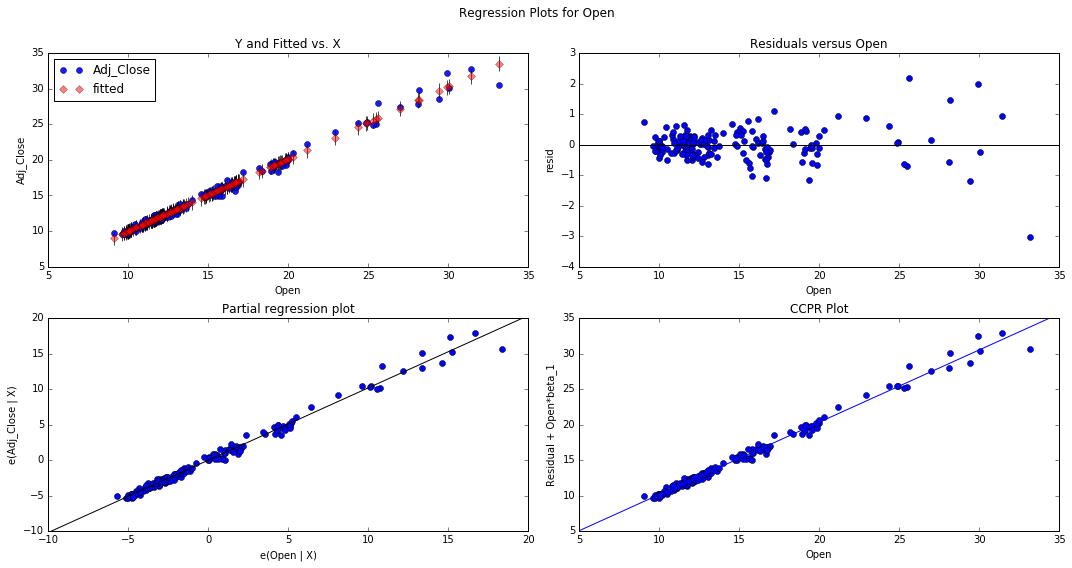

In [8]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(stock_model, "Open", fig=fig)

In [9]:
# predictor variable (X) and dependent variable (y)
X = df[['Open']]
y = df[['Adj_Close']]

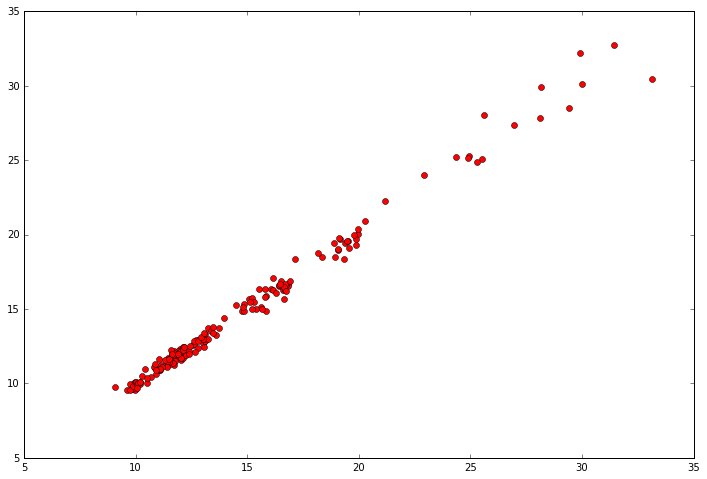

In [10]:
plt.figure(figsize=(12,8))

plt.plot(X, y, 'ro')
plt.show()

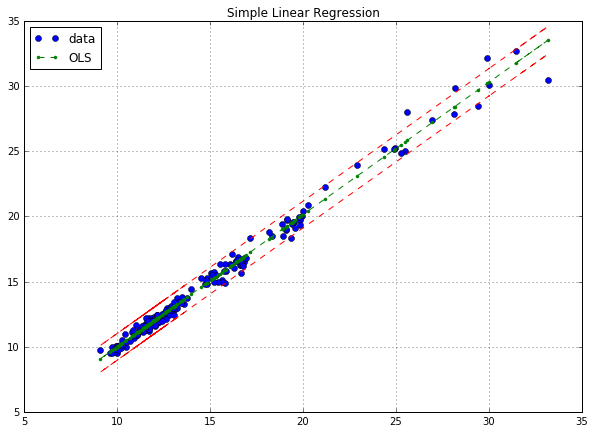

In [11]:
# Plot Stock Charts
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(stock_model)
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(X, y, 'bo', label="data")

# Plot trend line
ax.plot(X, stock_model.fittedvalues, 'g--.', label="OLS")

# Plot upper and lower confidence interval
ax.plot(X, confidence_interval_upper, 'r--')
ax.plot(X, confidence_interval_lower, 'r--')

# Plot title, grid, and legend
ax.set_title('Simple Linear Regression')
ax.grid()
ax.legend(loc='best')

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
 a = model.coef_ * X + model.intercept_
 a

,Open
0,10.404165
1,11.614108
2,12.112319
3,12.203827
4,12.020811
5,12.010643
6,11.634443
7,12.081816
8,11.827627
9,12.061481


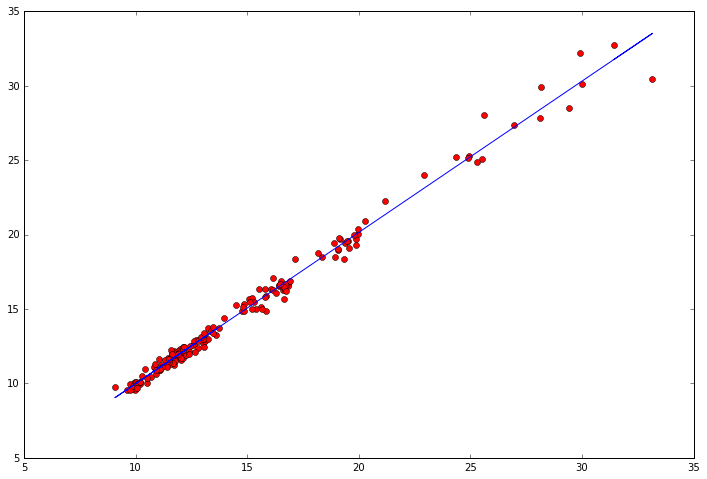

In [14]:
plt.figure(figsize=(12,8))
plt.plot(X, y, 'ro', X, a)
axes = plt.gca()
# axes.set_ylim([0, 30])
plt.show()

# Multiple Linear Regression

In [15]:
# Multi Features
stock_models = ols("Adj_Close ~ Open + High + Low + Volume", data=df).fit()

In [16]:
stock_models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.171e+04
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          1.82e-232
Time:                        21:20:28   Log-Likelihood:                 16.329
No. Observations:                 178   AIC:                            -22.66
Df Residuals:                     173   BIC:                            -6.750
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0308      0.066     -0.466      0.642      -0.161       0.100
Open          -0.6663      0.062    -10.799      0.000      -0.788      -0.544
High           1.0066      0.089     11.350      0.000       0.832       1.182
Low            0.6671      0.079      8.408      0.000       0.511       0.824
Volume      -2.43e-09    7.9e-10     -3.075      0.002   -3.99e-09    -8.7e-10
==============================================================================
Omnibus:                       59.860   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.974
Skew:                          -1.087   Prob(JB):                     2.25e-77
Kurtosis:                       9.547   Cond. No.                     6.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

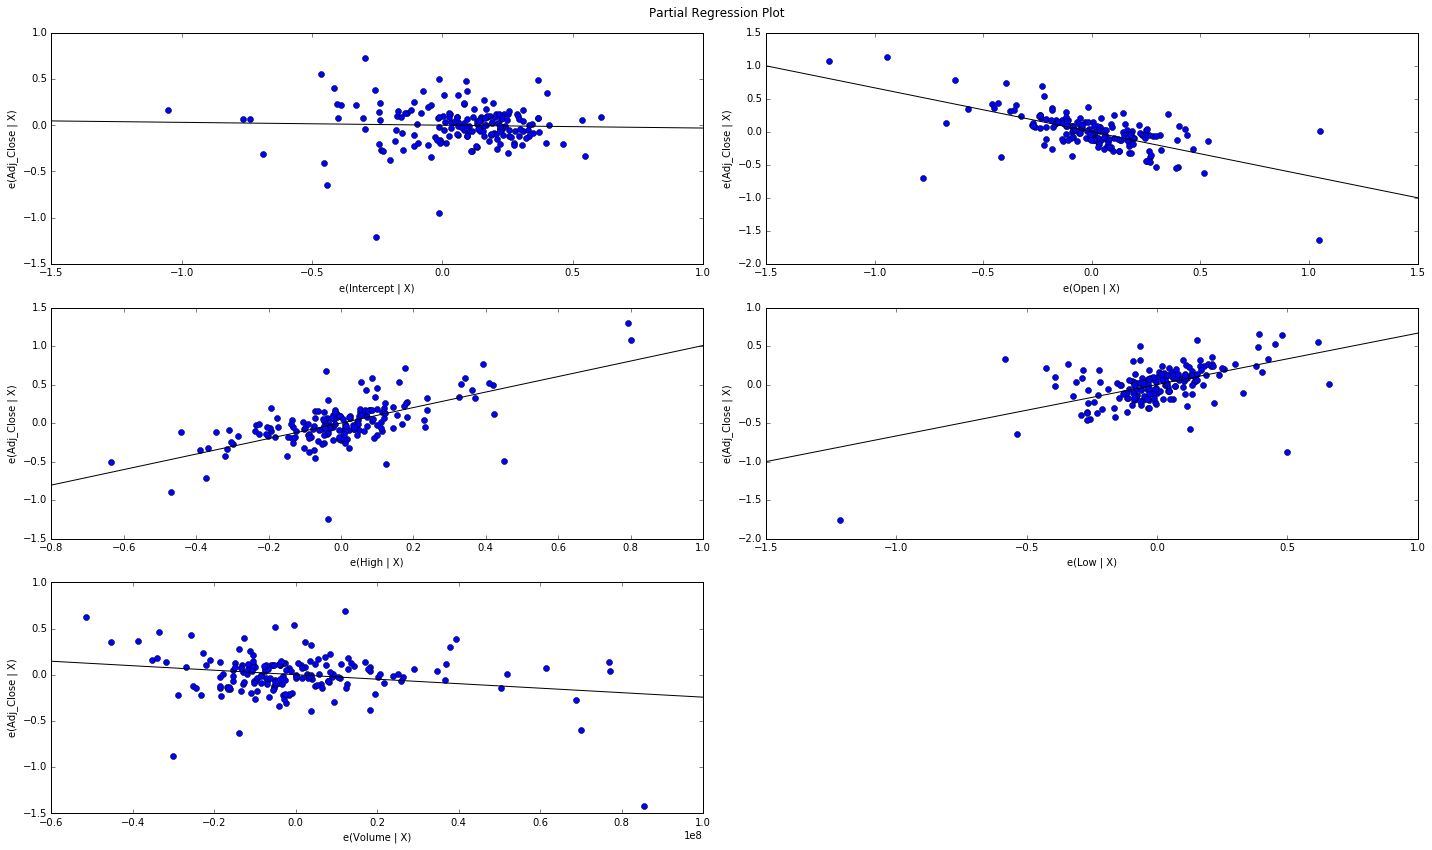

In [17]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(stock_models, fig=fig)

In [18]:
# 2nd order polynomial
from sklearn.preprocessing import PolynomialFeatures

X = df[['High', 'Low']]
y = df[['Adj_Close']]
poly_2 = PolynomialFeatures(degree=2)
X = poly_2.fit_transform(X)

In [19]:
model2 = LinearRegression()
model2.fit(X, y)
model2.coef_

array([[ 0.        , -0.0642992 ,  1.08980114, -0.51337035,  1.12375418,
        -0.61322593]])

In [20]:
model2.score(X, y)

0.99753836829697173

In [21]:
# 2nd order polynomial
X = df[['Open', 'Low']]
y = df[['Adj_Close']]
poly_2 = PolynomialFeatures(degree=2)
X = poly_2.fit_transform(X)

model2 = LinearRegression()
model2.fit(X, y)
model2.coef_

model2.score(X, y)

0.99622255253000191

In [22]:
# 2nd order polynomial
X = df[['Open', 'High']]
y = df[['Adj_Close']]
poly_2 = PolynomialFeatures(degree=2)
X = poly_2.fit_transform(X)

model2 = LinearRegression()
model2.fit(X, y)
model2.coef_

model2.score(X, y)

0.9958532214170388

In [23]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['Open', 'High']].values
y = df[['Adj_Close']].values

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X)
poly.fit(X,y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print(X.shape)
print(y.shape)

(178, 2)
(178, 1)


In [27]:
X = X[:,:-1]
X.shape

(178, 1)

In [28]:
# Slicing with [:, :-1] will give you a 2-dimensional array (including all rows and all columns excluding the last column).

# Slicing with [:, 1] will give you a 1-dimensional array (including all rows from the second column). 
# To make this array also 2-dimensional use [:, 1:2] or [:, 1].reshape(-1, 1) or [:, 1][:, None] instead of [:, 1]. This will make x and y comparable.

# An alternative to making both arrays 2-dimensional is making them both one dimensional.
# For this one would do [:, 0] (instead of [:, :1]) for selecting the first column and [:, 1] for selecting the second column.

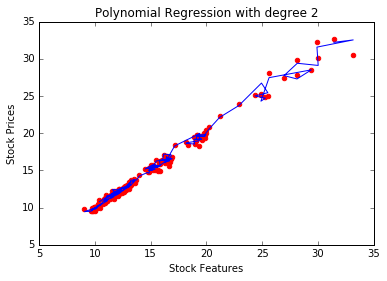

In [29]:
# Plotting the data for Plynomial Regression 
regressor=LinearRegression()
regressor.fit(X,y)
plt.scatter(X,y, color='red')
plt.plot(X,poly_regression.predict(poly_features))
plt.title("Polynomial Regression with degree 2")
plt.xlabel("Stock Features")
plt.ylabel("Stock Prices")
plt.show()

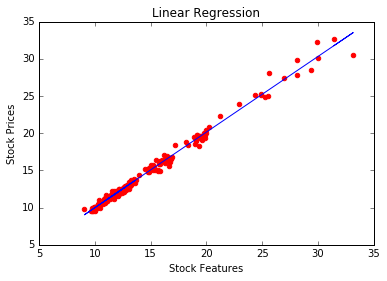

In [30]:
# Plotting the Linear Regression
plt.scatter(X,y, color='red')
plt.plot(X,regressor.predict(X))
plt.title("Linear Regression")
plt.xlabel("Stock Features")
plt.ylabel("Stock Prices")
plt.show()

In [31]:
# 3rd order polynomial
X = df[['Open', 'High', 'Low']]
y = df[['Adj_Close']]
poly_3 = PolynomialFeatures(degree=3)
X = poly_3.fit_transform(X)

In [32]:
model3 = LinearRegression()
model3.fit(X, y)
model3.coef_

array([[  0.00000000e+00,   5.20014004e-02,   7.05613812e-01,
          2.05588478e-01,   1.18715008e+00,   8.52325294e-01,
         -3.45073305e+00,  -1.64394354e+00,   2.61627771e+00,
          4.40527917e-01,   4.59426084e-03,   1.94696861e+00,
         -2.17649113e+00,   2.94783472e-01,  -4.68297000e+00,
          4.85254693e+00,  -1.68339320e+00,   5.12542737e+00,
         -3.07618731e+00,  -6.05134136e-01]])

In [33]:
model3.score(X, y)

0.99899609260978406

In [34]:
X = df[['Open', 'High', 'Low']].values
y = df[['Adj_Close']].values
poly = PolynomialFeatures(degree=3)
poly_features = poly.fit_transform(X)
poly.fit(X,y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
X = X[:,:-2]
X.shape

(178, 1)

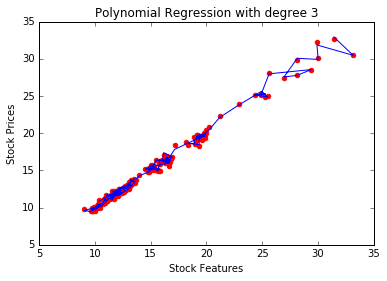

In [36]:
# Plotting the data for Plynomial Regression 
plt.scatter(X,y, color='red')
plt.plot(X,poly_regression.predict(poly_features))
plt.title("Polynomial Regression with degree 3")
plt.xlabel("Stock Features")
plt.ylabel("Stock Prices")
plt.show()

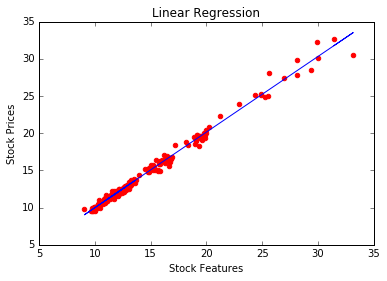

In [37]:
# Plotting the Linear Regression
plt.scatter(X,y, color='red')
plt.plot(X,regressor.predict(X))
plt.title("Linear Regression")
plt.xlabel("Stock Features")
plt.ylabel("Stock Prices")
plt.show()

In [38]:
# 4th order polynomial
X = df[['Open', 'High', 'Low', 'Volume']]
y = df[['Adj_Close']]
poly_4 = PolynomialFeatures(degree=4)
X = poly_4.fit_transform(X)

In [39]:
model4 = LinearRegression()
model4.fit(X, y)
model4.coef_

array([[ -5.48458520e-21,  -7.60211085e-20,   2.07537326e-24,
         -2.04480116e-25,  -4.91043594e-26,  -5.60092375e-25,
         -1.56522787e-20,  -5.75171025e-19,  -1.20939904e-19,
         -1.35785275e-19,  -5.82729648e-19,   1.53265888e-18,
          1.46552795e-33,   4.85038222e-27,   1.02509567e-20,
          2.78191249e-32,   2.72658707e-32,   2.71659247e-32,
          8.23166523e-26,   2.67197924e-32,   2.66662114e-32,
          8.02474806e-26,   2.65762802e-32,   8.00720594e-26,
          2.25425071e-19,   2.61879518e-32,   2.61770124e-32,
          7.85188489e-26,   2.61281114e-32,   7.84221061e-26,
          2.18314140e-19,   2.60456378e-32,   7.82145369e-26,
          2.17543112e-19,   9.31155825e-25,   2.54508460e-31,
          2.51380725e-31,   2.48267705e-31,   5.22032815e-25,
          2.49705101e-31,   2.46597023e-31,   5.07378405e-25,
          2.43195851e-31,   5.02593349e-25,   7.14606474e-19,
          2.49748398e-31,   2.46459394e-31,   5.05957129e-25,
        

In [40]:
model4.score(X, y)

0.7690138140531112

In [41]:
X = df[['Open', 'High', 'Low', 'Volume']].values
y = df[['Adj_Close']].values
poly = PolynomialFeatures(degree=4)
poly_features = poly.fit_transform(X)
poly.fit(X,y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
X = X[:,:-3]
X.shape

(178, 1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

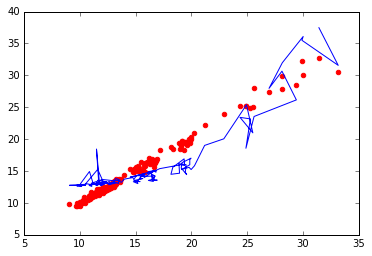

In [43]:
# Plotting the data for Plynomial Regression 
plt.scatter(X,y, color='red')
plt.plot(X,poly_regression.predict(poly_features))
poly = PolynomialFeatures(degree=4)
poly_features = poly.fit_transform(X)
poly.fit(X,y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y)

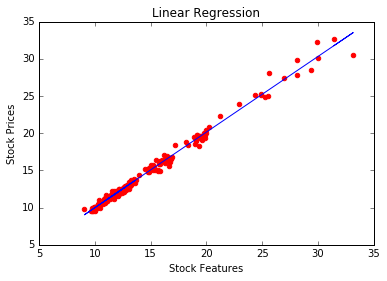

In [44]:
# Plotting the Linear Regression
plt.scatter(X,y, color='red')
plt.plot(X,regressor.predict(X))
plt.title("Linear Regression")
plt.xlabel("Stock Features")
plt.ylabel("Stock Prices")
plt.show()